In [8]:
from __future__ import print_function
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Image dimensions in OpenCV

width: 1920
height: 1080
channels: 3


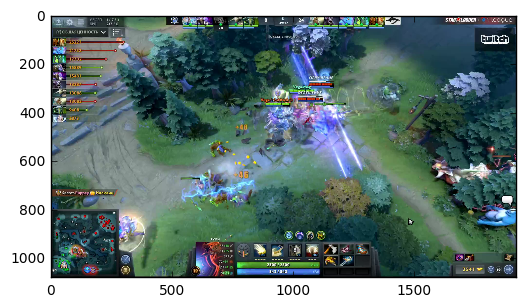

In [128]:
img = cv2.imread('data/1.png')

print("width:", img.shape[1])
print("height:", img.shape[0])
print("channels:", img.shape[2])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Access pixels

In [129]:
print(img[0, 1])

print(img[0:3, 0:5])

[ 0  0 12]
[[[  0   0  12]
  [  0   0  12]
  [  0   0  12]
  [  0   0  12]
  [  0   0  12]]

 [[105 120 134]
  [105 120 134]
  [105 120 134]
  [105 120 134]
  [105 120 134]]

 [[105 120 134]
  [105 120 134]
  [105 120 134]
  [105 120 134]
  [105 120 134]]]


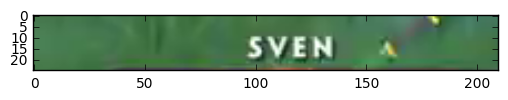

In [130]:
# MINIMAP
# img = img[-280:-1, 0:280]

# Current hero name
img = img[910:935, 560:770]

plt.imshow(img)
plt.show()

# Split color channels

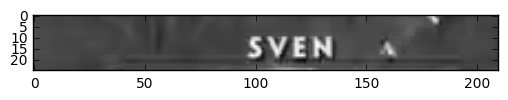

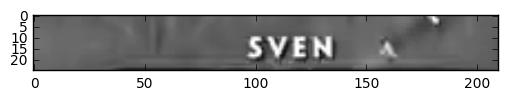

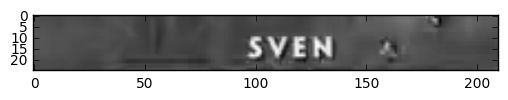

In [131]:
(R, G, B) = cv2.split(img)

plt.imshow(R, cmap='gray')
plt.show()
plt.imshow(G, cmap='gray')
plt.show()
plt.imshow(B, cmap='gray')
plt.show()

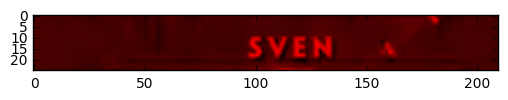

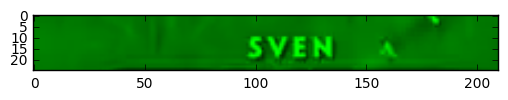

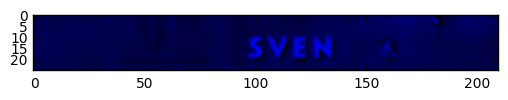

In [132]:
zeros = np.zeros(img.shape[:2], dtype=np.uint8)
R = cv2.merge([R, zeros, zeros])
G = cv2.merge([zeros, G, zeros])
B = cv2.merge([zeros, zeros, B])

plt.imshow(R)
plt.show()
plt.imshow(G)
plt.show()
plt.imshow(B)
plt.show()

# Color spaces : HSV and LAB

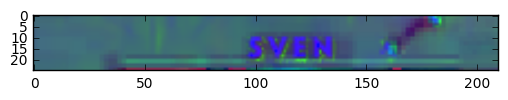

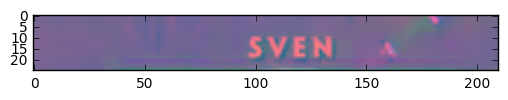

In [133]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

plt.imshow(img_hsv)
plt.show()

plt.imshow(img_lab)
plt.show()

# Histogram : one color channel at a time

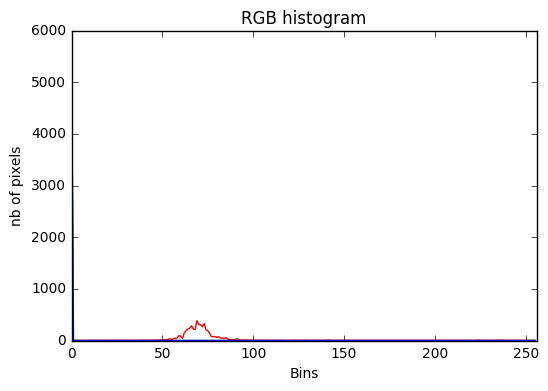

In [134]:
plt.figure()
plt.title("RGB histogram")
plt.xlabel("Bins")
plt.ylabel("nb of pixels")
plt.xlim([0, 256])

for (chan, color) in zip((R,G,B), ('r', 'g', 'b')):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.show()

# Histogram : two color channels at a time

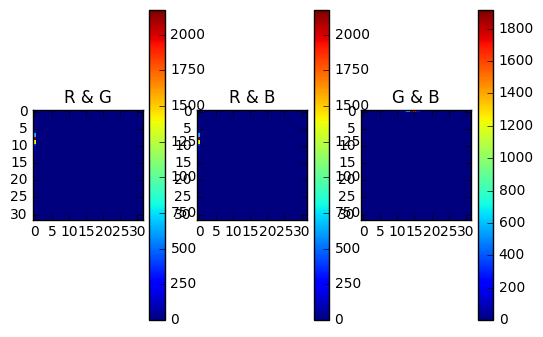

In [135]:
fig = plt.figure()

for (pos, chans, txt) in zip((131, 132, 133), ([R,G], [R,B], [G,B]), ("R & G", "R & B", "G & B")):
    ax = fig.add_subplot(pos)
    hist = cv2.calcHist(chans, [0, 1], None, [32, 32], [0, 256, 0, 256])
    p = ax.imshow(hist, interpolation='nearest')
    ax.set_title(txt)
    fig.colorbar(p)
plt.show()

# Histogram equalization

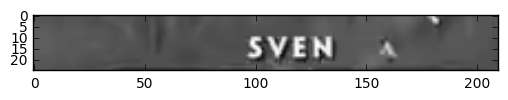

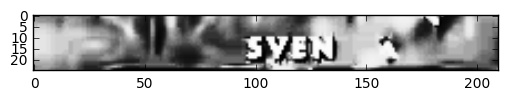

In [136]:
img_gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_eq = cv2.equalizeHist(img_gs)

plt.imshow(img_gs, cmap='gray')
plt.show()

plt.imshow(img_eq, cmap='gray')
plt.show()

# Blur

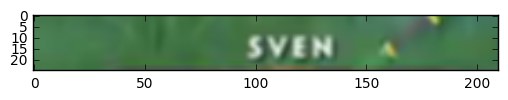

In [139]:
img_blur = cv2.blur(img, (3,3))

plt.imshow(img_blur)
plt.show()

# Gaussian Blur

more natural blur

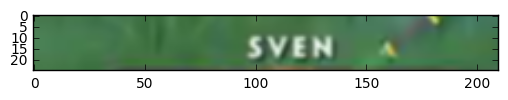

In [165]:
img_gaussian_blur = cv2.GaussianBlur(img, (3,3), 0)

plt.imshow(img_gaussian_blur)
plt.show()

# Median Blur

better for reducing noise

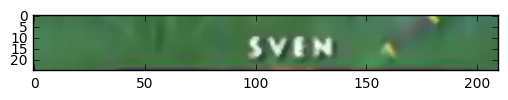

In [143]:
img_median_blur = cv2.medianBlur(img, 3)

plt.imshow(img_median_blur)
plt.show()

# Bilateral Blur

reduce noise and preserve edges but slower

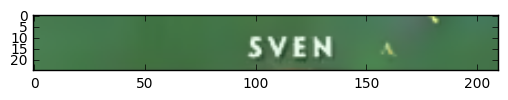

In [144]:
img_bilateral_blur = cv2.bilateralFilter(img, 20, 70, 70)

plt.imshow(img_bilateral_blur)
plt.show()

# Simple Thresholding

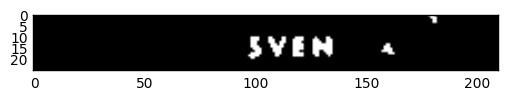

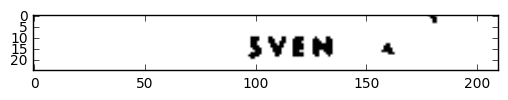

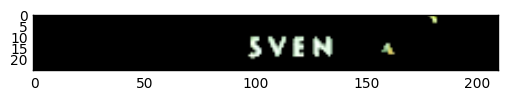

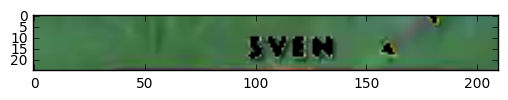

In [195]:
img_gs_blur = cv2.GaussianBlur(img_gs, (3,3), 0)

limit = 150
(T, thresh) = cv2.threshold(img_gs_blur, limit, 255, cv2.THRESH_BINARY)
(T, thresh_inv) = cv2.threshold(img_gs_blur, limit, 255, cv2.THRESH_BINARY_INV)

img_thresh = cv2.bitwise_and(img, img, mask=thresh)
img_thresh_inv = cv2.bitwise_and(img, img, mask=thresh_inv)

plt.imshow(thresh, cmap='gray')
plt.show()

plt.imshow(thresh_inv, cmap='gray')
plt.show()

plt.imshow(img_thresh)
plt.show()

plt.imshow(img_thresh_inv)
plt.show()

# Adaptive Thresholding

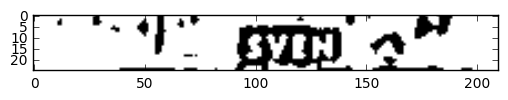

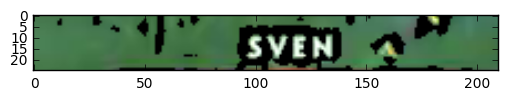

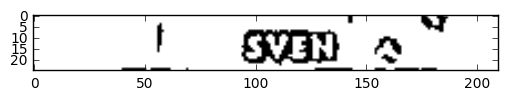

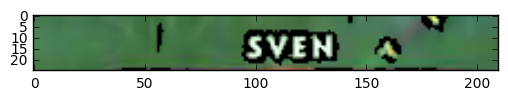

In [167]:
thresh_mean = cv2.adaptiveThreshold(
    img_gs_blur,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11, # must be odd
    4
)

thresh_gauss = cv2.adaptiveThreshold(
    img_gs_blur,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    9, # must be odd
    4
)

img_thresh_mean = cv2.bitwise_and(img, img, mask=thresh_mean)
img_thresh_gauss = cv2.bitwise_and(img, img, mask=thresh_gauss)

plt.imshow(thresh_mean, cmap='gray')
plt.show()

plt.imshow(img_thresh_mean)
plt.show()

plt.imshow(thresh_gauss, cmap='gray')
plt.show()

plt.imshow(img_thresh_gauss)
plt.show()

# Otsu Thresholding

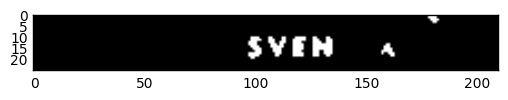

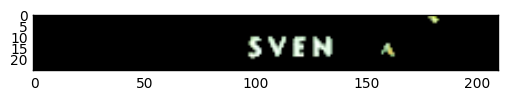

In [168]:
T, thresh_otsu = cv2.threshold(
    img_gs_blur,
    0,
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

img_thresh_otsu = cv2.bitwise_and(img, img, mask=thresh_otsu)

plt.imshow(thresh_otsu, cmap='gray')
plt.show()

plt.imshow(img_thresh_otsu)
plt.show()

# Edges detection : Laplacian

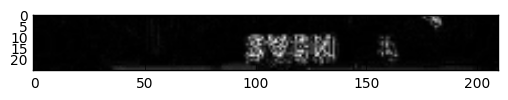

In [171]:
img_laplacian = cv2.Laplacian(img_gs, cv2.CV_64F)
img_laplacian = np.uint8(np.absolute(img_laplacian))

plt.imshow(img_laplacian, cmap='gray')
plt.show()

# Edges detection : Sobel

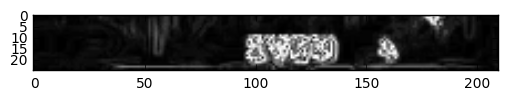

In [172]:
sobelX = cv2.Sobel(img_gs, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img_gs, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobel = cv2.bitwise_or(sobelX, sobelY)

plt.imshow(sobel, cmap='gray')
plt.show()

# Edges detection : Canny

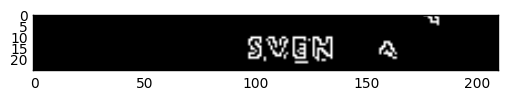

In [215]:
canny = cv2.Canny(img_gs, 200, 255)
# is not an edge < param1 < is an edge or not < param2 < is an edge

plt.imshow(canny, cmap='gray')
plt.show()

# Counting countours and draw them

nb countours: 11


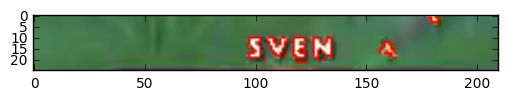

In [216]:
(_, cnts, _) = cv2.findContours(
    canny.copy(),
    cv2.RETR_EXTERNAL, # retrieve only the outermost countours
    cv2.CHAIN_APPROX_SIMPLE # approximation of countours chains
)

print('nb countours:', len(cnts))

img_countours = img.copy()
cv2.drawContours(img_countours, cnts, -1, (255,0,0), 1)
# param3: countour index to draw (if -1, all countours)

plt.imshow(img_countours)
plt.show()

# Cropping countours

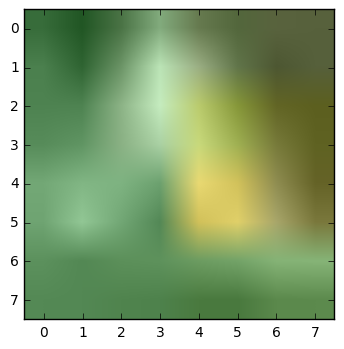

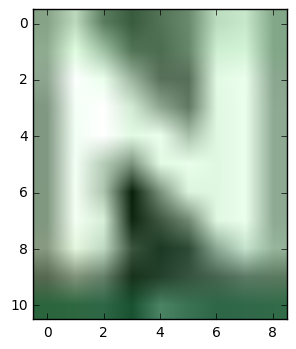

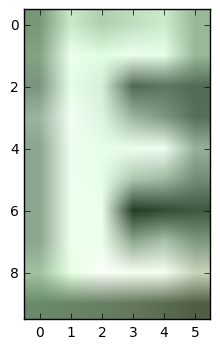

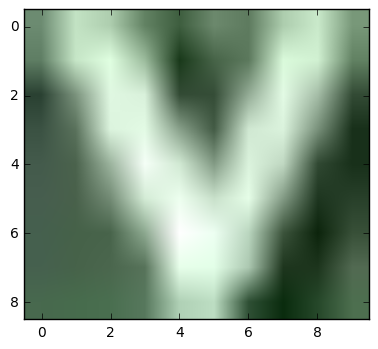

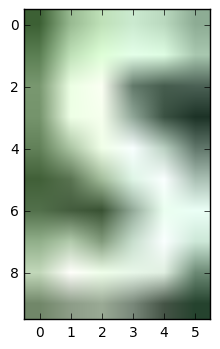

In [221]:
img_box = img.copy()
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    if w < 5 or h < 5:
        continue
    shape = img[y:y+h, x:x+w]
    plt.imshow(shape)
    plt.show()
    
    cv2.rectangle(img_box, (x,y), (x+w,y+h), (255,0,0))


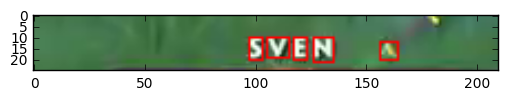

In [222]:
plt.imshow(img_box)
plt.show()

# Draw line

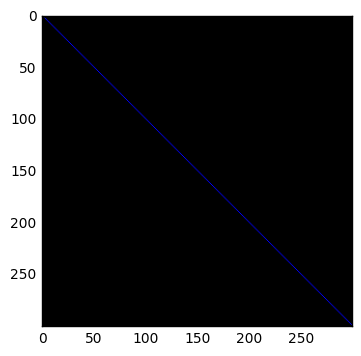

In [13]:
canvas = np.zeros((300, 300, 3), dtype=np.uint8)

cv2.line(canvas, (0,0), (300,300), (0, 0, 255))

plt.imshow(canvas)
plt.show()